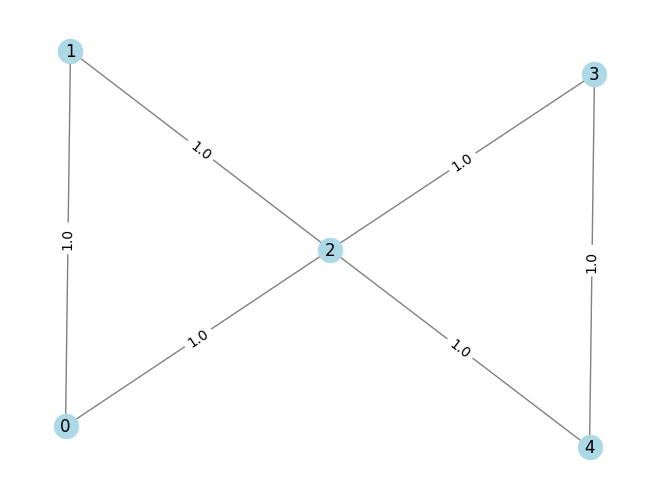

[[0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0.]]
Problem name: Max-cut

Maximize
  -2*x_0*x_1 - 2*x_0*x_2 - 2*x_1*x_2 - 2*x_2*x_3 - 2*x_2*x_4 - 2*x_3*x_4 + 2*x_0
  + 2*x_1 + 4*x_2 + 2*x_3 + 2*x_4

Subject to
  No constraints

  Binary variables (5)
    x_0 x_1 x_2 x_3 x_4

SparsePauliOp(['IIIZZ', 'IIZIZ', 'IIZZI', 'IZZII', 'ZIZII', 'ZZIII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j]) -3.0
energy: -1.0
max-cut objective: -4.0
objective function value: 4.0
variable values: x_0=0.0, x_1=1.0, x_2=1.0, x_3=1.0, x_4=0.0
status: SUCCESS
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [156]:
import numpy as np
import utils 
import Qmaxcut
import Cmaxcut
import importlib
from qiskit_algorithms import NumPyMinimumEigensolver

importlib.reload(utils)
importlib.reload(Qmaxcut)
importlib.reload(Cmaxcut)

n=np.arange(0, 5, 1)
w_e=[(0, 1, 1.0), (0, 2, 1.0), (1, 2, 1.0), (3, 2, 1.0), (3, 4, 1.0), (4, 2, 1.0)]
G = utils.createGraph(n, w_e)
utils.visualizeGraph(G)
prob=utils.encode(G)

qubitOp, offset=prob.to_ising()
print(qubitOp, offset)
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("max-cut objective:", result.eigenvalue.real + offset)

utils.classicalMaxcutInbuilt(prob)

#DOES NOT WORK!!!
H_cost = Cmaxcut.problemHamiltonianMatrix(G)
print(H_cost)






In [151]:
#tests with to_ising() Hamiltonian
paulis = qubitOp.paulis  
coeffs = qubitOp.coeffs  
print(paulis, coeffs)

ising_matrix = qubitOp.to_matrix()
print(ising_matrix)

eigenvalues, _ = np.linalg.eigh(ising_matrix)
min_eigenvalue = np.min(eigenvalues)
print(min_eigenvalue)

['IIIZZ', 'IIZIZ', 'IIZZI', 'IZZII', 'ZIZII', 'ZZIII'] [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
[[3.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 3.+0.j]]
-1.0


Offset: -3.0
Ising Hamiltonian:
SparsePauliOp(['IIIZZ', 'IIZIZ', 'IIZZI', 'IZZII', 'ZIZII', 'ZZIII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])
[[3.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 3.+0.j]]
Eigenvalues of the custom Hamiltonian:
[ 3.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j
 -1.+0.j  1.+0.j  1.+0.j  1.+0.j  3.+0.j]


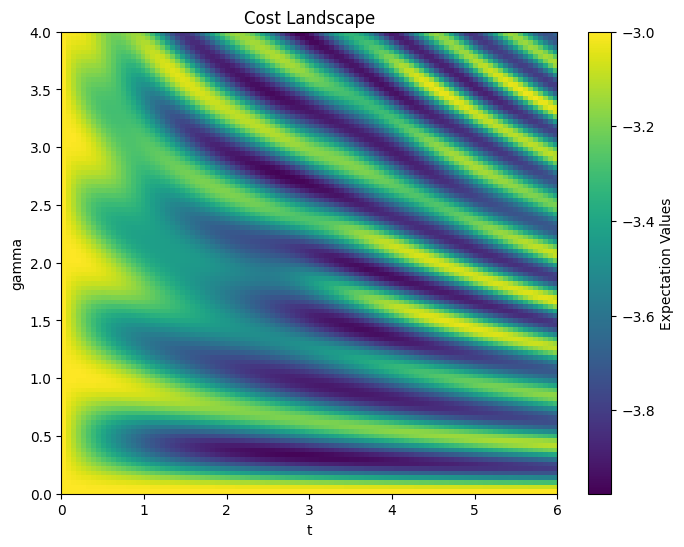

In [152]:
H_cost, offset = Cmaxcut.problemHamiltonian(prob)
print(H_cost)

eigenvalues = np.linalg.eigvals(H_cost)

# Print eigenvalues
print("Eigenvalues of the custom Hamiltonian:")
print(eigenvalues)


H_walk = Cmaxcut.hypercubeHamiltonian(5)

initial_state = Cmaxcut.initialState(5)

gamma = np.linspace(0, 4, 100)
t = np.linspace(0, 6, 100)

Cmaxcut.QW(H_cost, H_walk, t, initial_state, gamma)
Cmaxcut.costLandscape(H_cost, H_walk, t, initial_state, gamma, offset)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


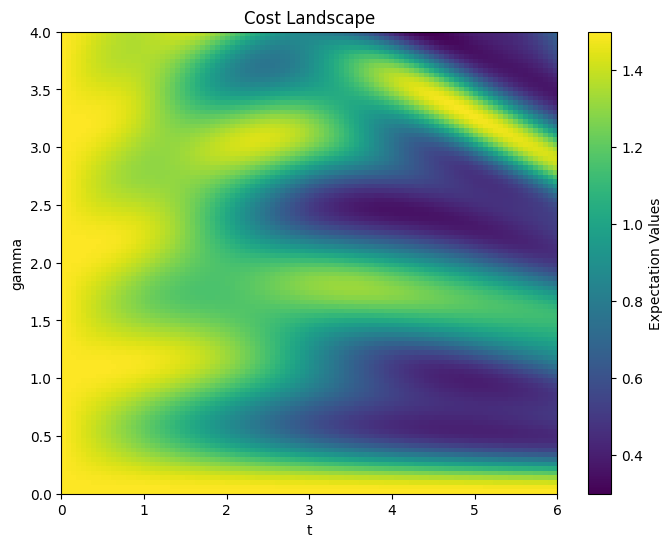

In [153]:
H_cost = Cmaxcut.problemHamiltonianMatrix(G)
print(H_cost)

H_walk = Cmaxcut.hypercubeHamiltonian(5)

initial_state = Cmaxcut.initialState(5)

gamma = np.linspace(0, 4, 100)
t = np.linspace(0, 6, 100)
Cmaxcut.QW(H_cost, H_walk, t, initial_state, gamma)
Cmaxcut.costLandscape(H_cost, H_walk, t, initial_state, gamma, 0)


h vector:
[0. 0. 0. 0. 0.]
J matrix:
[[0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0.]]
[[6. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 6.]]
Eigenvalues of the custom Hamiltonian:
[ 6.  2.  2.  2. -2. -2. -2.  2.  2. -2. -2. -2. -2. -2. -2.  2.  2. -2.
 -2. -2. -2. -2. -2.  2.  2. -2. -2. -2.  2.  2.  2.  6.]
Lowest eigenvalue of the custom Hamiltonian:
-2.0


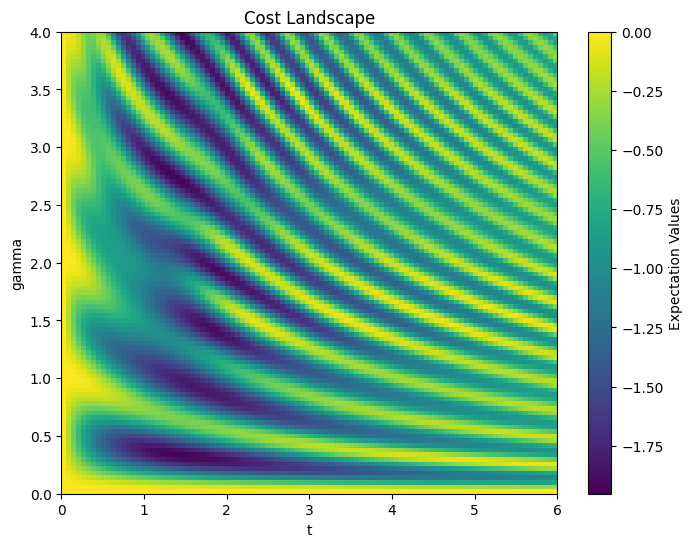

In [154]:
#using method from the paper to create problem hamiltonian to check

def sigma_z(): # create Pauli z matrix
	return np.array([[1,0],[0,-1]])
	
def make_ith_operator(op,n,i_op): # uses tensor products to make operator op act on qubit i_op qubit
	op_ten=np.array([[1]]) # 1 by 1 identity
	for  i_kron in range(n): # create tensor product
		if i_kron==i_op: # if this is where the operator needs to be tensored in
			op_ten=np.kron(op_ten,op)
		else: # otherwise
			op_ten=np.kron(op_ten,np.eye(2))
	return(op_ten)

def make_problem_hamiltonian(h,J): # make a problem Hamiltonian using h and J vectors and matrices
	n=len(J) # number of qubits
	H_prob=np.zeros([2**n,2**n]) # start with all zeros
	for i_J in range(n): # first index
		H_prob=H_prob+h[i_J]*make_ith_operator(sigma_z(),n,i_J)
		for j_J in range(i_J,n): # second index
			H_prob=H_prob+J[i_J,j_J]*make_ith_operator(sigma_z(),n,i_J)*make_ith_operator(sigma_z(),n,j_J)
	return H_prob
	

num_qubits = 5  
edges = [(0, 1, 1.0), (0, 2, 1.0), (1, 2, 1.0), (3, 2, 1.0), (3, 4, 1.0), (4, 2, 1.0)]
num_qubits = 5
# Define h as a zero vector of length num_qubits
h = np.zeros(num_qubits)

# Define J as a matrix with size num_qubits x num_qubits, initialized to zeros
J = np.zeros((num_qubits, num_qubits))

# Fill in the J matrix based on the edge weights from the graph
for (i, j, weight) in edges:
    J[i, j] = weight
    J[j, i] = weight  # Ensure the matrix is symmetric for undirected edges

# Check the output
print("h vector:")
print(h)
print("J matrix:")
print(J)
hamiltonian_matrix=make_problem_hamiltonian(h,J)
print(hamiltonian_matrix)

eigenvalues = np.linalg.eigvals(hamiltonian_matrix)

# Print eigenvalues
print("Eigenvalues of the custom Hamiltonian:")
print(eigenvalues)

# Find the lowest eigenvalue
lowest_eigenvalue = np.min(eigenvalues)
print("Lowest eigenvalue of the custom Hamiltonian:")
print(lowest_eigenvalue)

H_walk = Cmaxcut.hypercubeHamiltonian(5)

initial_state = Cmaxcut.initialState(5)

gamma = np.linspace(0, 4, 100)
t = np.linspace(0, 6, 100)
Cmaxcut.QW(hamiltonian_matrix, H_walk, t, initial_state, gamma)
Cmaxcut.costLandscape(hamiltonian_matrix, H_walk, t, initial_state, gamma, 0)



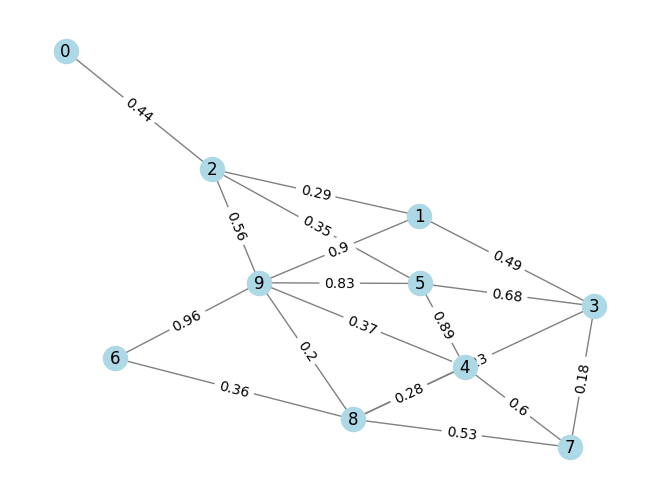

In [157]:
test_graph = utils.createRandomGraph(10, 0.5)

utils.visualizeGraph(test_graph)

In [159]:
test_prob=utils.encode(test_graph)

qubitOp, offset=test_prob.to_ising()
print(qubitOp, offset)
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("max-cut objective:", result.eigenvalue.real + offset)

utils.classicalMaxcutInbuilt(test_prob)


[[0.   0.   0.44 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.29 0.49 0.   0.   0.   0.   0.   0.9 ]
 [0.44 0.29 0.   0.   0.   0.35 0.   0.   0.   0.56]
 [0.   0.49 0.   0.   0.   0.68 0.   0.18 0.23 0.  ]
 [0.   0.   0.   0.   0.   0.89 0.   0.6  0.28 0.37]
 [0.   0.   0.35 0.68 0.89 0.   0.   0.   0.   0.83]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.36 0.96]
 [0.   0.   0.   0.18 0.6  0.   0.   0.   0.53 0.  ]
 [0.   0.   0.   0.23 0.28 0.   0.36 0.53 0.   0.2 ]
 [0.   0.9  0.56 0.   0.37 0.83 0.96 0.   0.2  0.  ]]
Problem name: Max-cut

Maximize
  -0.88*x_0*x_2 - 0.58*x_1*x_2 - 0.98*x_1*x_3 - 1.8*x_1*x_9 - 0.7*x_2*x_5
  - 1.12*x_2*x_9 - 1.36*x_3*x_5 - 0.36*x_3*x_7 - 0.46*x_3*x_8 - 1.78*x_4*x_5
  - 1.2*x_4*x_7 - 0.56*x_4*x_8 - 0.74*x_4*x_9 - 1.66*x_5*x_9 - 0.72*x_6*x_8
  - 1.92*x_6*x_9 - 1.06*x_7*x_8 - 0.4*x_8*x_9 + 0.44*x_0
  + 1.6800000000000002*x_1 + 1.6400000000000001*x_2 + 1.5799999999999998*x_3
  + 2.14*x_4 + 2.75*x_5 + 1.3199999999999998*x_6 + 1.31*x_7
  + 1.5999999999

Offset: -4.570000000000003
Ising Hamiltonian:
SparsePauliOp(['IIIIIIIZII', 'IIIIIIIIZI', 'IIIIIIZIII', 'ZIIIIIIIII', 'IIIIZIIIII', 'IIZIIIIIII', 'IZIIIIIIII', 'IIIZIIIIII', 'IIIIIIIZIZ', 'IIIIIIIZZI', 'IIIIIIZIZI', 'ZIIIIIIIZI', 'IIIIZIIZII', 'ZIIIIIIZII', 'IIIIZIZIII', 'IIZIIIZIII', 'IZIIIIZIII', 'IIIIZZIIII', 'IIZIIZIIII', 'IZIIIZIIII', 'ZIIIIZIIII', 'ZIIIZIIIII', 'IZIZIIIIII', 'ZIIZIIIIII', 'IZZIIIIIII', 'ZZIIIIIIII'],
              coeffs=[ 5.55111512e-17+0.j,  5.55111512e-17+0.j, -9.71445147e-17+0.j,
  8.32667268e-17+0.j, -1.11022302e-16+0.j,  5.55111512e-17+0.j,
 -8.32667268e-17+0.j, -5.55111512e-17+0.j,  2.20000000e-01+0.j,
  1.45000000e-01+0.j,  2.45000000e-01+0.j,  4.50000000e-01+0.j,
  1.75000000e-01+0.j,  2.80000000e-01+0.j,  3.40000000e-01+0.j,
  9.00000000e-02+0.j,  1.15000000e-01+0.j,  4.45000000e-01+0.j,
  3.00000000e-01+0.j,  1.40000000e-01+0.j,  1.85000000e-01+0.j,
  4.15000000e-01+0.j,  1.80000000e-01+0.j,  4.80000000e-01+0.j,
  2.65000000e-01+0.j,  1.00000000e-01+0.j

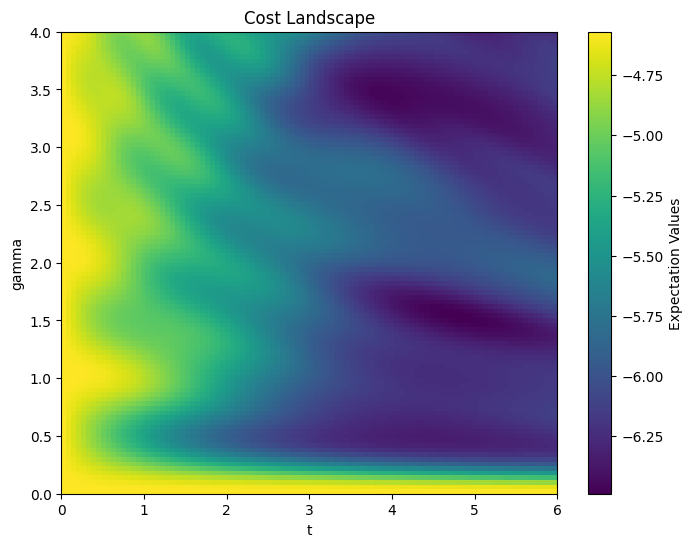

In [160]:
H_cost, offset = Cmaxcut.problemHamiltonian(test_prob)
print(H_cost)

eigenvalues = np.linalg.eigvals(H_cost)

# Print eigenvalues
print("Eigenvalues of the custom Hamiltonian:")
print(eigenvalues)


H_walk = Cmaxcut.hypercubeHamiltonian(10)

initial_state = Cmaxcut.initialState(10)

gamma = np.linspace(0, 4, 100)
t = np.linspace(0, 6, 100)

Cmaxcut.QW(H_cost, H_walk, t, initial_state, gamma)
Cmaxcut.costLandscape(H_cost, H_walk, t, initial_state, gamma, offset)